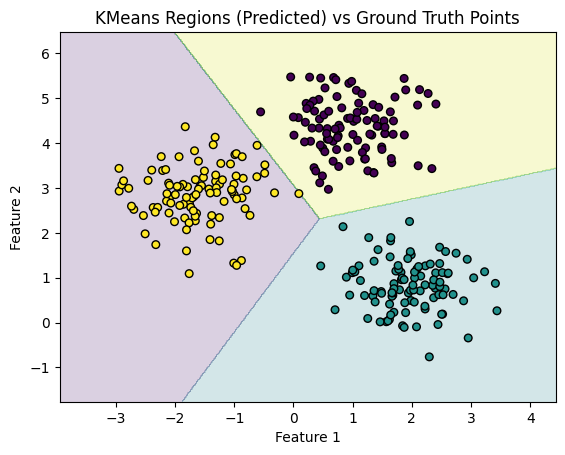

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Example dataset with ground truth
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
y_pred = kmeans.fit_predict(X)

# Create mesh grid for background
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict cluster for each grid point
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Background (predicted clusters)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')

# Foreground (ground truth points)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=30, cmap='viridis', edgecolor='k')

plt.title("KMeans Regions (Predicted) vs Ground Truth Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
